# PROBLEMA DE NEGOCIO





La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.


### Tareas principales:
1. Preprocesamiento de Datos: Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

2. Exploración de Datos: Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

3. Construcción de Modelos: Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

4. Evaluación y Selección del Modelo: Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

## 1. Configuración del Ambiente
- En este paso cargo las librerias que considero importante y que utilizare en todo el proceso 
- En este paso también cargo la base que se trabajará

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import  roc_curve
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_validate, ShuffleSplit
global df_banco, resultados

In [2]:
df_banco = pd.read_csv("german_credit.csv", sep=',')


## 2. Preprocesamiento de Datos
- Aca realizare unos pequeños analisis exploratorios iniciales, los cuales me ayudan a entender un poco el tamaño, las columnas, los valores nulos, valores repetidos, dimensiones de las variables y tipos de datos 

revisar los primeros 5 datos 

In [3]:
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


revisar el tamaño del datframe 

In [4]:
df_banco.shape

(1000, 21)

revisar cada una de las columnas 

In [5]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

revisar los datos de las columnas númericas 

In [6]:
df_banco.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


reviisar informacion de cada una de las columnas 

In [7]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

observar valores nulos

In [8]:
k = df_banco.isna().sum()
k[k!=0]

Series([], dtype: int64)

observar valores duplicados 

In [9]:
df_banco[df_banco.duplicated()]

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker


### CONCLUSIONES ITEM 2.
- Se entinede cada una de las columnas y se sobreentiende que la columna de salida para analizar es default, la cual es la categoria del consumidor. El 0 representa un buen pagador, y el 1 un mal pagador. 
- Nos damos cunat que excluyendo las columna de default, son 20 columnas a analizar 
- Se tiene que hay 7 columnas numericas y 13 variables categoricas, que con ayuda de tecnicas en el EDA y una exploracion más a fondo se tomara desiciones 
- No se encuentran valores nulos. lo cual es bueno.
- Tampoco se encuentran valores duplicados 

## 3. Exploración de Datos
- Acá lo que se realizara es técnicas EDA, para dectectar patrones, correlaciones, y asi definir que columnas son las que se van a tener en cuenta 

Grafica de correlacion 

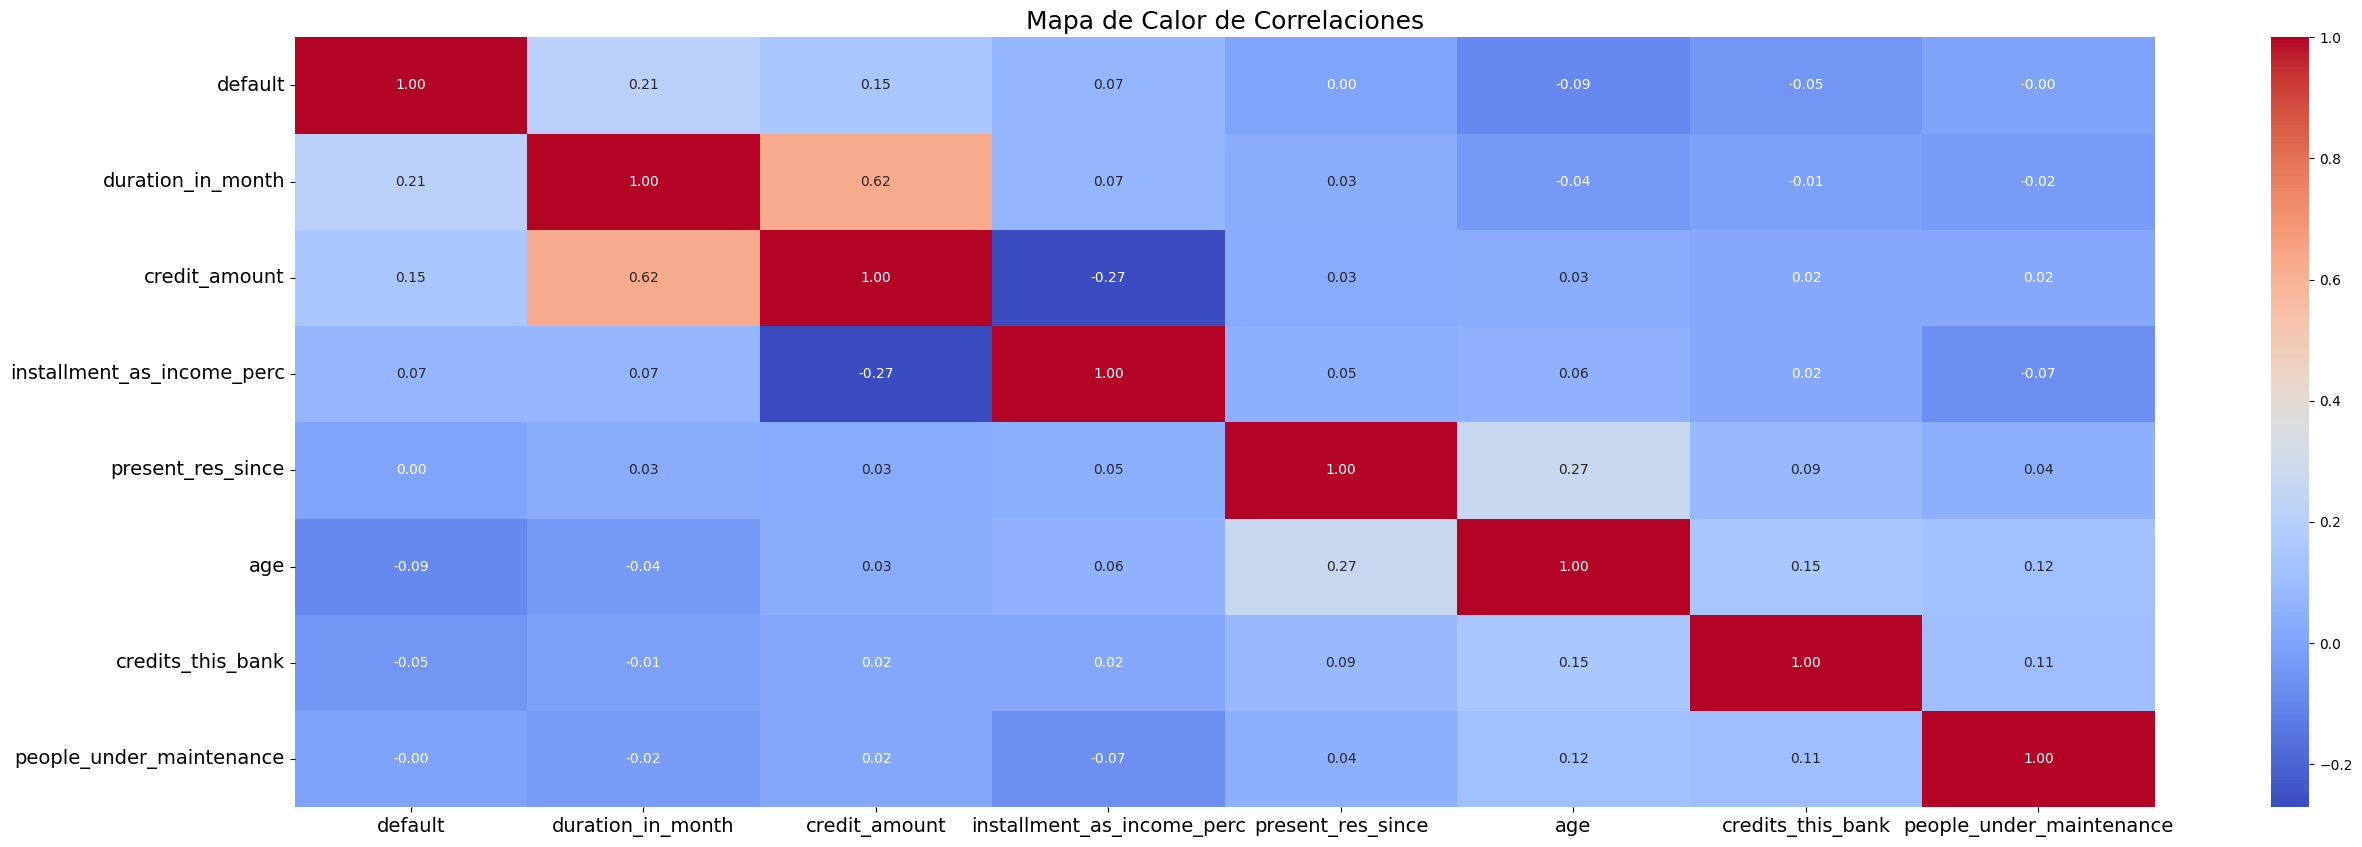

In [10]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

Calcular la variables de chi-cuadrado y valor-p para establecer relacion con la variable default

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency

# Obtener una lista de todas las columnas categóricas en el DataFrame
columnas_categoricas = df_banco.select_dtypes(include=['object']).columns

# Realizar la prueba de chi-cuadrado para cada par de variables categóricas
resultados_chi2 = {}
for columna in columnas_categoricas:
    if columna != 'default':  # Evitar comparar la variable categórica con ella misma
        contingency_table = pd.crosstab(df_banco['default'], df_banco[columna])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        resultados_chi2[columna] = {'chi2': chi2, 'p-valor': p}

# Imprimir los resultados
for columna, resultado in resultados_chi2.items():
    print(f"Asociación entre 'default' y '{columna}':")
    print("Valor de chi-cuadrado:", resultado['chi2'])
    print("P-valor:", resultado['p-valor'])

Asociación entre 'default' y 'account_check_status':
Valor de chi-cuadrado: 123.7209435162656
P-valor: 1.2189020722893755e-26
Asociación entre 'default' y 'credit_history':
Valor de chi-cuadrado: 61.69139696459551
P-valor: 1.2791872956750916e-12
Asociación entre 'default' y 'purpose':
Valor de chi-cuadrado: 33.35644686141815
P-valor: 0.00011574910079691586
Asociación entre 'default' y 'savings':
Valor de chi-cuadrado: 36.0989281924187
P-valor: 2.7612142385682596e-07
Asociación entre 'default' y 'present_emp_since':
Valor de chi-cuadrado: 18.3682738466968
P-valor: 0.0010454523491402541
Asociación entre 'default' y 'personal_status_sex':
Valor de chi-cuadrado: 9.60521395933605
P-valor: 0.02223800546926877
Asociación entre 'default' y 'other_debtors':
Valor de chi-cuadrado: 6.645366537264243
P-valor: 0.036055954027247226
Asociación entre 'default' y 'property':
Valor de chi-cuadrado: 23.719551283864707
P-valor: 2.8584415733250017e-05
Asociación entre 'default' y 'other_installment_plans':

Grafica de los valores anteriores

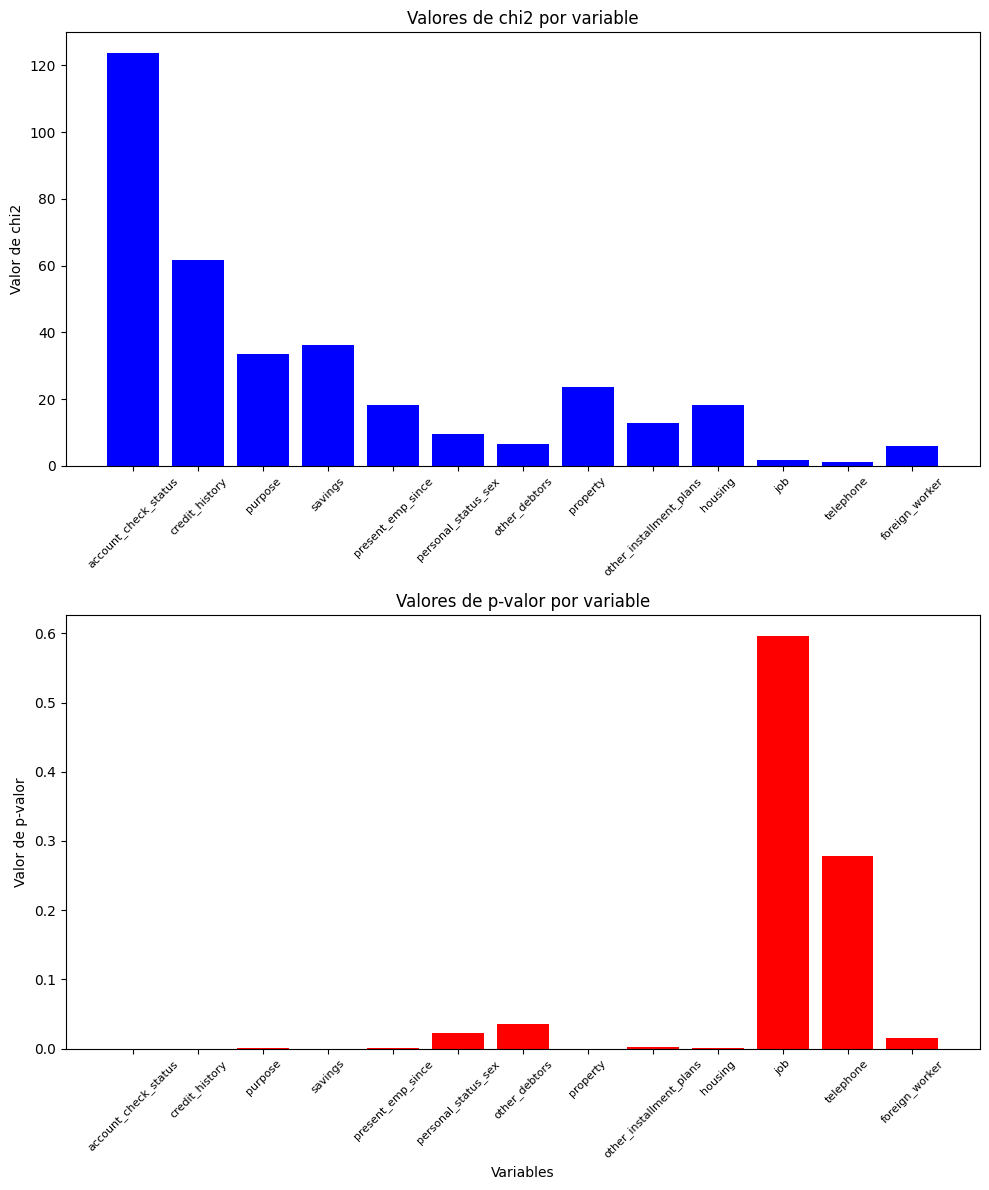

In [12]:
# Crear listas separadas para 'chi2' y 'p-valor'
variables = list(resultados_chi2.keys())
chi2_values = [resultados_chi2[key]['chi2'] for key in resultados_chi2]
p_valor_values = [resultados_chi2[key]['p-valor'] for key in resultados_chi2]

# Configuración de la gráfica de barras para chi2
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Crear las barras para chi2
ax[0].bar(variables, chi2_values, label='chi2', color='b')
ax[0].set_ylabel('Valor de chi2')
ax[0].set_title('Valores de chi2 por variable')

# Configuración de la gráfica de barras para p-valor
# Crear las barras para p-valor
ax[1].bar(variables, p_valor_values, label='p-valor', color='r')
ax[1].set_xlabel('Variables')
ax[1].set_ylabel('Valor de p-valor')
ax[1].set_title('Valores de p-valor por variable')

# Rotar los nombres de los ejes x y ajustar el tamaño de la fuente
ax[0].set_xticklabels(variables, rotation=45)
ax[1].set_xticklabels(variables, rotation=45)
ax[0].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='x', labelsize=8)

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

hago funciones para visualizar las distribuciones de las variables 

In [13]:
def group(df,x):
    df_1 = df.groupby(['default',x], as_index=False)['job'].count()
    return df_1

In [14]:
group(df_banco,'people_under_maintenance')

,default,people_under_maintenance,job
0,0,1,591
1,0,2,109
2,1,1,254
3,1,2,46


In [15]:
df_banco['people_under_maintenance'].value_counts()

1    845
2    155
Name: people_under_maintenance, dtype: int64

## VARIABLES CATEGORICAS

observar las variables categorixas 

In [16]:
ccols = [i for i in df_banco.columns if not i in df_banco._get_numeric_data()]
print (ccols)

['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']


In [17]:
len(ccols)

13

In [18]:
ccols[3:9]

['savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans']

Grafico para mirar la distribución de las variables categoricas

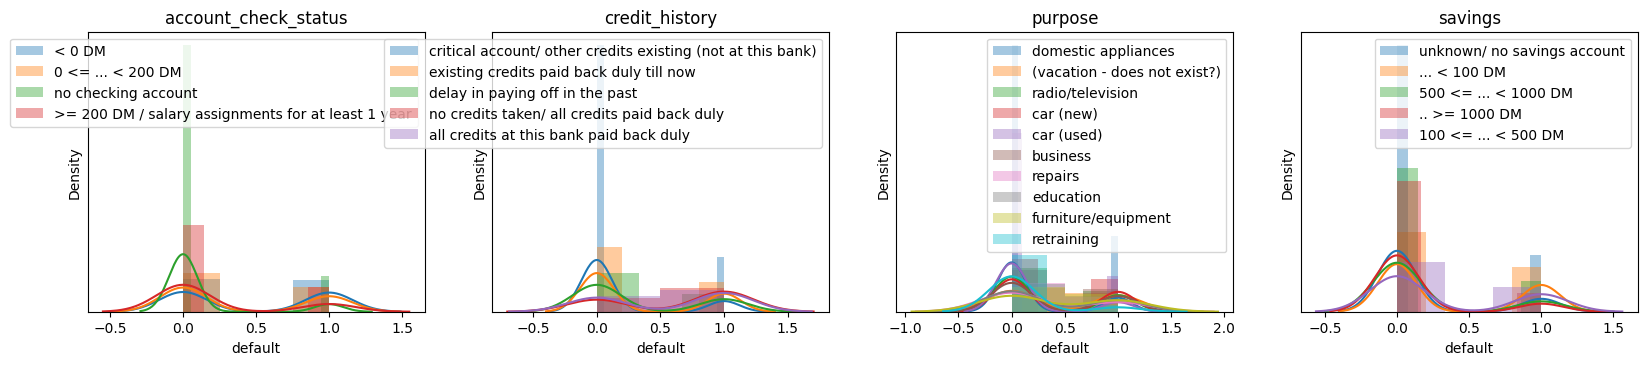

In [19]:
plt.figure(figsize=(20,8))
for i,c in enumerate(ccols[0:4]):    
    plt.subplot(2,4,i+1)
    # Crea el DataFrame "k" con las columnas de interés y elimina filas con valores faltantes
    k=df_banco[[c,"default"]].dropna()
      # Itera a través de los valores únicos de la columna actual
    for v in df_banco[c].dropna().unique():
        # Gráfico de distribución para cada valor único de la columna
        sns.distplot(k.default[k[c]==v], label=v)
        plt.title(c) # Establece el título del gráfico
    plt.yticks([])# Elimina las marcas del eje y
    plt.legend() # Muestra la leyenda
    

In [20]:
group(df_banco,'account_check_status')

,default,account_check_status,job
0,0,0 <= ... < 200 DM,164
1,0,< 0 DM,139
2,0,>= 200 DM / salary assignments for at least 1 ...,49
3,0,no checking account,348
4,1,0 <= ... < 200 DM,105
5,1,< 0 DM,135
6,1,>= 200 DM / salary assignments for at least 1 ...,14
7,1,no checking account,46


In [21]:
df_banco['account_check_status'].value_counts()

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

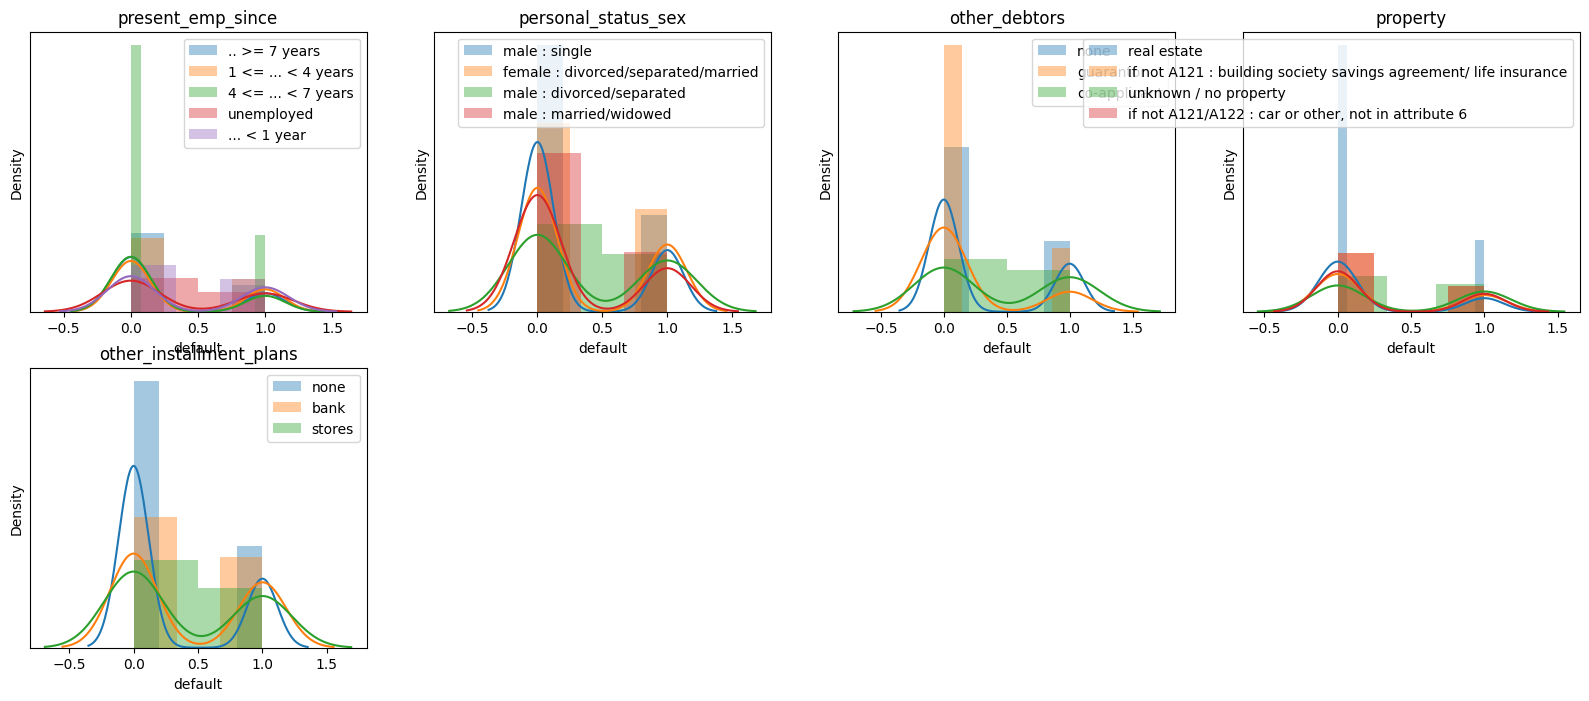

In [22]:
plt.figure(figsize=(20,8))
for i,c in enumerate(ccols[4:9]):    
    plt.subplot(2,4,i+1)
    # Crea el DataFrame "k" con las columnas de interés y elimina filas con valores faltantes
    k=df_banco[[c,"default"]].dropna()
      # Itera a través de los valores únicos de la columna actual
    for v in df_banco[c].dropna().unique():
        # Gráfico de distribución para cada valor único de la columna
        sns.distplot(k.default[k[c]==v], label=v)
        plt.title(c) # Establece el título del gráfico
    plt.yticks([])# Elimina las marcas del eje y
    plt.legend() # Muestra la leyenda
    

In [23]:
group(df_banco,'other_installment_plans')


,default,other_installment_plans,job
0,0,bank,82
1,0,none,590
2,0,stores,28
3,1,bank,57
4,1,none,224
5,1,stores,19


In [24]:
df_banco['other_installment_plans'].value_counts()

none      814
bank      139
stores     47
Name: other_installment_plans, dtype: int64

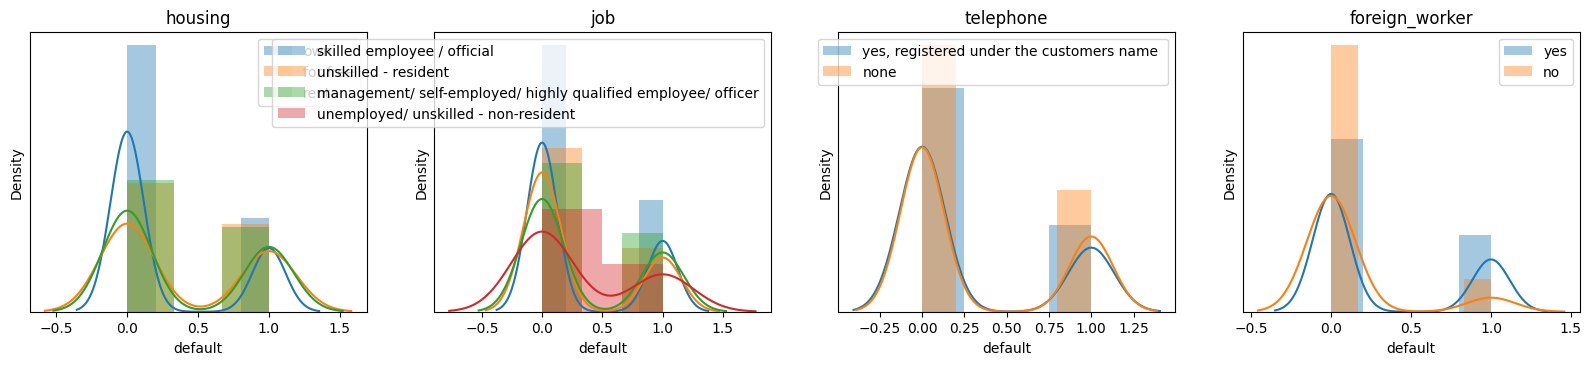

In [25]:
plt.figure(figsize=(20,8))
for i,c in enumerate(ccols[9:13]):    
    plt.subplot(2,4,i+1)
    # Crea el DataFrame "k" con las columnas de interés y elimina filas con valores faltantes
    k=df_banco[[c,"default"]].dropna()
      # Itera a través de los valores únicos de la columna actual
    for v in df_banco[c].dropna().unique():
        # Gráfico de distribución para cada valor único de la columna
        sns.distplot(k.default[k[c]==v], label=v)
        plt.title(c) # Establece el título del gráfico
    plt.yticks([])# Elimina las marcas del eje y
    plt.legend() # Muestra la leyenda
    

In [26]:
group(df_banco,'foreign_worker')

,default,foreign_worker,job
0,0,no,33
1,0,yes,667
2,1,no,4
3,1,yes,296


In [27]:
df_banco['foreign_worker'].value_counts()

yes    963
no      37
Name: foreign_worker, dtype: int64

### CONCLUSIONES VISUALIZACIONES.
- Establecer rangos en algunas columnas, es decir creear nuevas columnas a partir de columnas exitentes estableciendo rangos columnas opcionadas (age,duration_in_month,credit_amount), esto para tener un mayor manejo de los valores atipicos y Mejora la precisión predictiva.
- Elimiar posibles columnas de las cuales, que segun lo resulados arojados que supuestamente no tienen tanta relacion con default ( 'telephone', 'job', 'present_emp_since', 'installment_as_income_perc')

## OPERACIONES CON COLUMNAS 

Establecer rangos a las variables 

In [28]:
# Definir los límites de los rangos de edad
bins = [18, 30, 40, 50, 60, 100]  # Puedes ajustar estos límites según tus necesidades

# Definir las etiquetas para los rangos
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

# Utilizar pd.cut para dividir la columna 'age' en los rangos definidos
df_banco['age_range'] = pd.cut(df_banco['age'], bins=bins, labels=labels, right=False)


In [29]:
df_banco['rango_plazos_credito'] = pd.cut(x = df_banco['duration_in_month'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])
df_banco['rango_valor_credito'] = pd.cut(x = df_banco['credit_amount'], bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000], labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Eliminar las columnas originales de los rangos y las columnas que consideré que se podrian eliminar optimizando el modelo

In [30]:
df_banco = df_banco.drop(['age','duration_in_month','credit_amount','people_under_maintenance', 'present_emp_since','telephone'], axis=1)

In [31]:
# df_banco = df_banco.drop(['telephone', 'job', 'present_emp_since', 'installment_as_income_perc', 'credits_this_bank', 'people_under_maintenance', 'age', 'foreign_worker'], axis=1)

Crear copias del datframe original 

In [32]:
df_explore = df_banco.copy()
df_resp = df_banco.copy()

REMPLAZAR LAS VARIABLES CATEGORICAS 

lo que se hace acá es asignarle valores a cada item de las varibles 

In [33]:
def reasignar_category_a_enteros(df):
    for columna in df.select_dtypes(include=['object', 'category']).columns:
        valores_unicos = df[columna].unique()
        diccionario_reasignacion = {valor: indice for indice, valor in enumerate(valores_unicos)}
        df[columna] = df[columna].map(diccionario_reasignacion)
    return df

In [34]:
df_explore = reasignar_category_a_enteros(df_explore)

In [35]:
df_explore.shape

(1000, 18)

se aplica el get_dummies para convertir las variables categóricas en variables ficticias,facilitar este proceso de su uso en modelos de machine learning

In [36]:
# Seleccionar las columnas categóricas para aplicar get_dummies
columnas_categoricas = ['account_check_status','credit_history', 'purpose',  'savings', 'installment_as_income_perc','personal_status_sex', 'other_debtors','age_range','rango_plazos_credito','rango_valor_credito',
                         'present_res_since', 'property','other_installment_plans', 'housing', 'credits_this_bank', 'job', 'foreign_worker']
# Aplicar get_dummies a las columnas categóricas
df_explore = pd.get_dummies(df_explore, columns=columnas_categoricas)

# Mostrar el DataFrame con variables codificadas
df_explore.head(5)

,default,account_check_status_0,account_check_status_1,account_check_status_2,account_check_status_3,credit_history_0,credit_history_1,credit_history_2,credit_history_3,credit_history_4,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,savings_0,savings_1,savings_2,savings_3,savings_4,installment_as_income_perc_1,installment_as_income_perc_2,installment_as_income_perc_3,installment_as_income_perc_4,personal_status_sex_0,personal_status_sex_1,personal_status_sex_2,personal_status_sex_3,other_debtors_0,other_debtors_1,other_debtors_2,age_range_1,age_range_4,age_range_2,age_range_3,age_range_0,rango_plazos_credito_0,rango_plazos_credito_2,rango_plazos_credito_3,rango_plazos_credito_1,rango_plazos_credito_4,rango_plazos_credito_5,rango_valor_credito_0.0,rango_valor_credito_1.0,rango_valor_credito_2.0,rango_valor_credito_3.0,rango_valor_credito_4.0,rango_valor_credito_5.0,rango_valor_credito_6.0,rango_valor_credito_7.0,rango_valor_credito_8.0,rango_valor_credito_9.0,rango_valor_credito_10.0,rango_valor_credito_11.0,rango_valor_credito_12.0,rango_valor_credito_13.0,rango_valor_credito_14.0,rango_valor_credito_15.0,rango_valor_credito_16.0,present_res_since_1,present_res_since_2,present_res_since_3,present_res_since_4,property_0,property_1,property_2,property_3,other_installment_plans_0,other_installment_plans_1,other_installment_plans_2,housing_0,housing_1,housing_2,credits_this_bank_1,credits_this_bank_2,credits_this_bank_3,credits_this_bank_4,job_0,job_1,job_2,job_3,foreign_worker_0,foreign_worker_1
0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
4,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [37]:
df_explore.shape

(1000, 88)

### Normalizacion 
-  la normalización se realiza para asegurar que las variables estén en una escala comparable, mejorar el desempeño de los modelo.

In [38]:
# Inicializa el escalador Min-Max
scaler = MinMaxScaler()

# Normaliza todas las columnas del DataFrame
df_normalized = df_explore.copy()  # Crear una copia del DataFrame original
df_normalized[df_explore.columns] = scaler.fit_transform(df_normalized[df_explore.columns])

In [39]:
df_normalized.head()

,default,account_check_status_0,account_check_status_1,account_check_status_2,account_check_status_3,credit_history_0,credit_history_1,credit_history_2,credit_history_3,credit_history_4,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,savings_0,savings_1,savings_2,savings_3,savings_4,installment_as_income_perc_1,installment_as_income_perc_2,installment_as_income_perc_3,installment_as_income_perc_4,personal_status_sex_0,personal_status_sex_1,personal_status_sex_2,personal_status_sex_3,other_debtors_0,other_debtors_1,other_debtors_2,age_range_1,age_range_4,age_range_2,age_range_3,age_range_0,rango_plazos_credito_0,rango_plazos_credito_2,rango_plazos_credito_3,rango_plazos_credito_1,rango_plazos_credito_4,rango_plazos_credito_5,rango_valor_credito_0.0,rango_valor_credito_1.0,rango_valor_credito_2.0,rango_valor_credito_3.0,rango_valor_credito_4.0,rango_valor_credito_5.0,rango_valor_credito_6.0,rango_valor_credito_7.0,rango_valor_credito_8.0,rango_valor_credito_9.0,rango_valor_credito_10.0,rango_valor_credito_11.0,rango_valor_credito_12.0,rango_valor_credito_13.0,rango_valor_credito_14.0,rango_valor_credito_15.0,rango_valor_credito_16.0,present_res_since_1,present_res_since_2,present_res_since_3,present_res_since_4,property_0,property_1,property_2,property_3,other_installment_plans_0,other_installment_plans_1,other_installment_plans_2,housing_0,housing_1,housing_2,credits_this_bank_1,credits_this_bank_2,credits_this_bank_3,credits_this_bank_4,job_0,job_1,job_2,job_3,foreign_worker_0,foreign_worker_1
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Balancear los resultados.
- teniendo en cuenta que hay un desbalance, se realizara over_sampling, para corregir esto
- Se realiza con la técnica de sobre-muestreo sintético (SMOTE) para generar muestras adicionales de la clase minoritaria. Esto es fundamental para garantizar que el modelo entrenado no esté sesgado hacia la clase mayoritaria y pueda realizar predicciones más precisas en conjuntos de datos desbalanceados.

In [40]:
#biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE
#dividiendo los datos en características y target
X = df_normalized.drop('default', axis = 1)
y = df_normalized['default']
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)
#unión de los datos balanceados
df_normalized = pd.concat([X, y], axis=1)

In [41]:
df_normalized.default.value_counts()

0.0    700
1.0    700
Name: default, dtype: int64

In [42]:
df_normalized.head()

,account_check_status_0,account_check_status_1,account_check_status_2,account_check_status_3,credit_history_0,credit_history_1,credit_history_2,credit_history_3,credit_history_4,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,savings_0,savings_1,savings_2,savings_3,savings_4,installment_as_income_perc_1,installment_as_income_perc_2,installment_as_income_perc_3,installment_as_income_perc_4,personal_status_sex_0,personal_status_sex_1,personal_status_sex_2,personal_status_sex_3,other_debtors_0,other_debtors_1,other_debtors_2,age_range_1,age_range_4,age_range_2,age_range_3,age_range_0,rango_plazos_credito_0,rango_plazos_credito_2,rango_plazos_credito_3,rango_plazos_credito_1,rango_plazos_credito_4,rango_plazos_credito_5,rango_valor_credito_0.0,rango_valor_credito_1.0,rango_valor_credito_2.0,rango_valor_credito_3.0,rango_valor_credito_4.0,rango_valor_credito_5.0,rango_valor_credito_6.0,rango_valor_credito_7.0,rango_valor_credito_8.0,rango_valor_credito_9.0,rango_valor_credito_10.0,rango_valor_credito_11.0,rango_valor_credito_12.0,rango_valor_credito_13.0,rango_valor_credito_14.0,rango_valor_credito_15.0,rango_valor_credito_16.0,present_res_since_1,present_res_since_2,present_res_since_3,present_res_since_4,property_0,property_1,property_2,property_3,other_installment_plans_0,other_installment_plans_1,other_installment_plans_2,housing_0,housing_1,housing_2,credits_this_bank_1,credits_this_bank_2,credits_this_bank_3,credits_this_bank_4,job_0,job_1,job_2,job_3,foreign_worker_0,foreign_worker_1,default
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# MODELOS 

separo las variables de salida y las etrada 

In [43]:
X = df_normalized.drop("default", axis=1)
Y= df_normalized["default"]


separo las variables de test y entreno 


In [44]:
Xtr, Xts, ytr, yts = train_test_split(X,Y, test_size=0.3)
print (Xtr.shape, ytr.shape, Xts.shape, yts.shape)

(980, 87) (980,) (420, 87) (420,)


Se evaluara varios modelos y se les realizara una evaluacion con diferentes metricas para asi, poder escoger el mejor modelo, es importante tener en cuenta que primero se realiza sin ajustar hiperparametros y ya luego de los modelos, que mejor se comportaron se modifica los hiperparametros, hasta tener el que desde mi punto de vista se obtenga un buen resultado 

### Tener en cuanta  a la hora de la evaluacion :

- Accuracy: es una medida de la fracción de predicciones que el modelo clasifica correctamente. La precisión es útil para evaluar el rendimiento general del modelo

- Precision: La precisión es la proporción de verdaderos positivos (instancias relevantes recuperadas) sobre el número total de instancias recuperadas. Esta métrica es importante cuando el costo de los falsos positivos es alto.

- Recall: La recuperación es la proporción de verdaderos positivos sobre el número total de instancias relevantes. Es útil cuando el costo de los falsos negativos es alto.

- F1 Score: El puntaje F1 es la media armónica de la precisión y la recuperación. Proporciona una única puntuación que equilibra ambos aspectos, lo que lo hace útil cuando hay un desequilibrio en las clases o cuando se necesita encontrar un equilibrio entre precisión y recuperación.

- AUC-ROC: Esta métrica evalúa la capacidad de clasificación del modelo a varios umbrales. Representa la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. Es útil para comparar el rendimiento de los modelos y para evaluar su capacidad de discriminación.

Es importante evaluar todas estas métricas porque cada una proporciona información relevante sobre diferentes aspectos del rendimiento del modelo. Al considerar todas estas métricas en conjunto, se obtiene una visión más completa y equilibrada del rendimiento del modelo, lo que permite tomar decisiones informadas sobre qué modelo seleccionar para una tarea de clasificación específica.

In [45]:
# Diccionarios para almacenar los resultados de prueba de cada modelo
test_accuracy = {}
test_precision = {}
test_recall = {}
test_f1 = {}
test_auc_roc = {}

# División de datos en entrenamiento y prueba
Xtr, Xts, ytr, yts = train_test_split(X, Y, test_size=0.3)

# Inicialización de modelos
models = {
    'SVC': SVC(gamma=0.1),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=150,max_depth=7),
    'Naive Bayes': GaussianNB()
}

# Entrenamiento y evaluación de modelos
for name, model in models.items():
    model.fit(Xtr, ytr)
    y_pred_tr = model.predict(Xtr)
    y_pred_ts = model.predict(Xts)
    
    # Cálculo de métricas
    acc_tr = accuracy_score(ytr, y_pred_tr)
    acc_ts = accuracy_score(yts, y_pred_ts)
    
    precision_tr = precision_score(ytr, y_pred_tr)
    precision_ts = precision_score(yts, y_pred_ts)
    
    recall_tr = recall_score(ytr, y_pred_tr)
    recall_ts = recall_score(yts, y_pred_ts)
    
    f1_tr = f1_score(ytr, y_pred_tr)
    f1_ts = f1_score(yts, y_pred_ts)
    
    auc_roc_tr = roc_auc_score(ytr, y_pred_tr)
    auc_roc_ts = roc_auc_score(yts, y_pred_ts)
    # Almacenar los resultados de prueba en los diccionarios
    test_accuracy[name] = acc_ts
    test_precision[name] = precision_ts
    test_recall[name] = recall_ts
    test_f1[name] = f1_ts
    test_auc_roc[name] = auc_roc_ts

    
    # Impresión de métricas
    print(f'Modelo: {name}')
    print(f'Accuracy - Train: {acc_tr:.3f}, Test: {acc_ts:.3f}')
    print(f'Precision - Train: {precision_tr:.3f}, Test: {precision_ts:.3f}')
    print(f'Recall - Train: {recall_tr:.3f}, Test: {recall_ts:.3f}')
    print(f'F1 Score - Train: {f1_tr:.3f}, Test: {f1_ts:.3f}')
    print(f'AUC-ROC - Train: {auc_roc_tr:.3f}, Test: {auc_roc_ts:.3f}')
    print('\n')

Modelo: SVC
Accuracy - Train: 0.940, Test: 0.850
Precision - Train: 0.942, Test: 0.837
Recall - Train: 0.936, Test: 0.880
F1 Score - Train: 0.939, Test: 0.858
AUC-ROC - Train: 0.940, Test: 0.849


Modelo: Logistic Regression
Accuracy - Train: 0.782, Test: 0.779
Precision - Train: 0.772, Test: 0.764
Recall - Train: 0.791, Test: 0.824
F1 Score - Train: 0.782, Test: 0.793
AUC-ROC - Train: 0.782, Test: 0.777


Modelo: Decision Tree
Accuracy - Train: 0.962, Test: 0.760
Precision - Train: 0.950, Test: 0.760
Recall - Train: 0.975, Test: 0.778
F1 Score - Train: 0.962, Test: 0.769
AUC-ROC - Train: 0.962, Test: 0.759




Modelo: Random Forest
Accuracy - Train: 0.924, Test: 0.867
Precision - Train: 0.927, Test: 0.857
Recall - Train: 0.919, Test: 0.889
F1 Score - Train: 0.923, Test: 0.873
AUC-ROC - Train: 0.924, Test: 0.866


Modelo: Naive Bayes
Accuracy - Train: 0.572, Test: 0.548
Precision - Train: 0.842, Test: 0.750
Recall - Train: 0.165, Test: 0.181
F1 Score - Train: 0.276, Test: 0.291
AUC-ROC - Train: 0.568, Test: 0.558




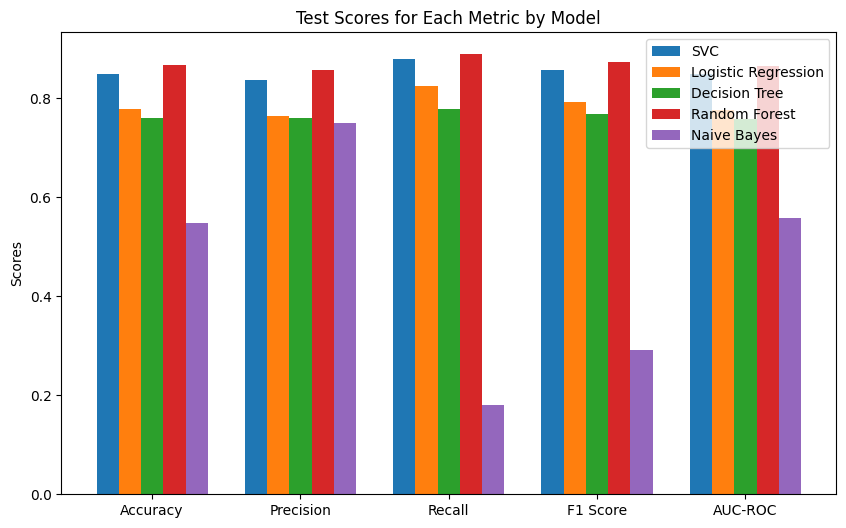

In [46]:
# Gráfico de barras para mostrar las métricas de prueba de cada modelo
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
models_list = list(models.keys())
x = range(len(models_list))
width = 0.15
# Modificación del tamaño de la gráfica
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(metrics))
width = 0.15

for i, model in enumerate(models_list):
    scores = [test_accuracy, test_precision, test_recall, test_f1, test_auc_roc]
    ax.bar([p + width*i for p in x], [score[model] for score in scores], width, label=model)

ax.set_ylabel('Scores')
ax.set_title('Test Scores for Each Metric by Model')
ax.set_xticks([p + 2*width for p in x])
ax.set_xticklabels(metrics)
ax.legend()
plt.show()

# RESULTADOS 
- El modelo de Support Vector Classifier (SVC) muestra un buen rendimiento en todas las métricas tanto en el conjunto de entrenamiento como en el de prueba, lo que sugiere que es consistente y generaliza bien a datos no vistos.
- El modelo de Random Forest también muestra un rendimiento sólido en todas las métricas, con una precisión ligeramente menor pero un buen equilibrio entre precisión y recuperación.
- El modelo de Naive Bayes tiene un rendimiento significativamente inferior en comparación con los otros modelos, con una baja precisión y recuperación, lo que indica que no es adecuado para este conjunto de datos.
Elección del modelo:


# CONCLUSIONES 
- Basándonos en los resultados, el modelo de Support Vector Classifier (SVC) sería la mejor elección, ya que muestra un rendimiento sólido en todas las métricas y es consistente tanto en el conjunto de entrenamiento como en el de prueba. Además, el modelo de Random Forest también es una buena opción, pero el SVC parece tener un rendimiento ligeramente superior en este caso..